In [2]:
import pandas as pd

# Load the dataset
file_path = "/Users/pauljose/Downloads/AMLdataset.xlsx"

# Load data from Sheet1 and Sheet2, selecting columns A to J
cleaned_data = pd.read_excel(file_path, sheet_name="Sheet1", usecols="A:J")
sheet2_data = pd.read_excel(file_path, sheet_name="Sheet2")

# Preview the dataset
print(cleaned_data.head())
print(sheet2_data.head())



ModuleNotFoundError: No module named 'pandas'

In [10]:
# Fill missing values (if any) for future use-cases
# Use median for numerical columns and mode for categorical columns
for column in cleaned_data.columns:
    if cleaned_data[column].dtype in ["float64", "int64"]:
        cleaned_data[column].fillna(cleaned_data[column].median(), inplace=True)
    elif cleaned_data[column].dtype == "object":
        cleaned_data[column].fillna(cleaned_data[column].mode()[0], inplace=True)

# Preview the cleaned dataset
print(cleaned_data.info())
print(cleaned_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID No      3046 non-null   int64  
 1   Prog Code  3046 non-null   object 
 2   Gender     3046 non-null   object 
 3   YoG        3046 non-null   int64  
 4   CGPA       3046 non-null   float64
 5   CGPA100    3046 non-null   float64
 6   CGPA200    3046 non-null   float64
 7   CGPA300    3046 non-null   float64
 8   CGPA400    3046 non-null   float64
 9   SGPA       3046 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 238.1+ KB
None
   ID No Prog Code  Gender   YoG      CGPA   CGPA100   CGPA200   CGPA300  \
0  42308       ICE  Female  2010  3.227513  2.875000  3.475000  2.615385   
1  70978       BCH  Female  2010  3.576271  3.250000  4.261905  3.368421   
2  31602       BCH    Male  2010  2.211454  1.777778  1.979167  1.489583   
3  63847       BCH    Male  2010  2.7029

/var/folders/zq/mtmfjlkj4lzf20jr5z8yxxxm0000gn/T/ipykernel_7203/29206324.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data[column].fillna(cleaned_data[column].median(), inplace=True)
/var/folders/zq/mtmfjlkj4lzf20jr5z8yxxxm0000gn/T/ipykernel_7203/29206324.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [15]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cleaned_data["Gender"] = label_encoder.fit_transform(cleaned_data["Gender"])
cleaned_data["YoG"] = label_encoder.fit_transform(cleaned_data["YoG"])

# Preview the encoded data
print(cleaned_data.head())


   ID No Prog Code  Gender  YoG      CGPA   CGPA100   CGPA200   CGPA300  \
0  42308       ICE       0    0  3.227513  2.875000  3.475000  2.615385   
1  70978       BCH       0    0  3.576271  3.250000  4.261905  3.368421   
2  31602       BCH       1    0  2.211454  1.777778  1.979167  1.489583   
3  63847       BCH       1    0  2.702970  2.673913  2.442308  2.000000   
4  30158       BCH       0    0  3.881657  3.608696  3.687500  3.625000   

    CGPA400      SGPA  
0  2.898305  3.125000  
1  3.469388  3.020833  
2  2.511111  2.187500  
3  2.348315  3.194444  
4  4.581395  4.236111  


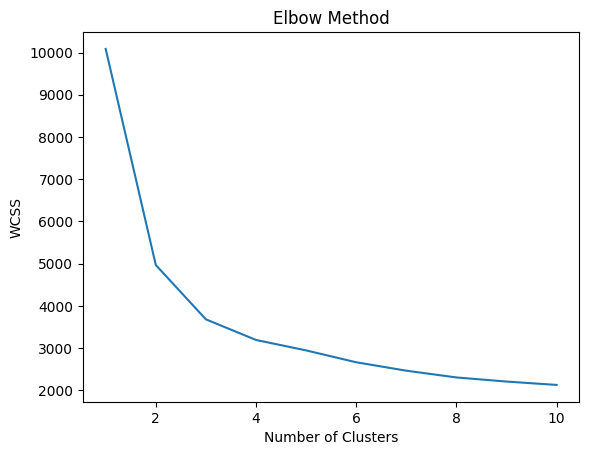

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select numerical features for clustering
numerical_features = cleaned_data[["CGPA", "CGPA100", "CGPA200", "CGPA300", "CGPA400", "SGPA"]]

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(numerical_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Apply K-Means with the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cleaned_data["Cluster"] = kmeans.fit_predict(numerical_features)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

print(cleaned_data.head())

   ID No Prog Code  Gender  YoG      CGPA   CGPA100   CGPA200   CGPA300  \
0  42308       ICE       0    0  3.227513  2.875000  3.475000  2.615385   
1  70978       BCH       0    0  3.576271  3.250000  4.261905  3.368421   
2  31602       BCH       1    0  2.211454  1.777778  1.979167  1.489583   
3  63847       BCH       1    0  2.702970  2.673913  2.442308  2.000000   
4  30158       BCH       0    0  3.881657  3.608696  3.687500  3.625000   

    CGPA400      SGPA  Cluster  
0  2.898305  3.125000        2  
1  3.469388  3.020833        2  
2  2.511111  2.187500        1  
3  2.348315  3.194444        1  
4  4.581395  4.236111        0  


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define target and features
X = cleaned_data.drop(columns=["ID No", "Cluster"])  # Drop irrelevant columns
y = cleaned_data["Cluster"]

# Encode any categorical features if necessary (e.g., Prog Code)
# One-hot encoding for categorical features like 'Prog Code'
X = pd.get_dummies(X, columns=['Prog Code'], drop_first=True)


print(X.head())
print(y.head())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate SVM
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Report:\n", classification_report(y_test, svm_predictions))

# Train and evaluate Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Report:\n", classification_report(y_test, dt_predictions))

# Train and evaluate Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naïve Bayes Report:\n", classification_report(y_test, nb_predictions))

# Train and evaluate KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("KNN Report:\n", classification_report(y_test, knn_predictions))


   Gender  YoG      CGPA   CGPA100   CGPA200   CGPA300   CGPA400      SGPA  \
0       0    0  3.227513  2.875000  3.475000  2.615385  2.898305  3.125000   
1       0    0  3.576271  3.250000  4.261905  3.368421  3.469388  3.020833   
2       1    0  2.211454  1.777778  1.979167  1.489583  2.511111  2.187500   
3       1    0  2.702970  2.673913  2.442308  2.000000  2.348315  3.194444   
4       0    0  3.881657  3.608696  3.687500  3.625000  4.581395  4.236111   

   Prog Code_BLD  Prog Code_CEN  ...  Prog Code_EEE  Prog Code_ICE  \
0          False          False  ...          False           True   
1          False          False  ...          False          False   
2          False          False  ...          False          False   
3          False          False  ...          False          False   
4          False          False  ...          False          False   

   Prog Code_MAT  Prog Code_MCB  Prog Code_MCE  Prog Code_MIS  Prog Code_PET  \
0          False          Fals